# 참가자 음성 수치 데이터 분석

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

eco_folder_path = '/Users/yang-eunseo/Desktop/log/eco/'
ppt_folder_path = '/Users/yang-eunseo/Desktop/log/ppt/'

eco_folder_list = os.listdir(eco_folder_path)
ppt_folder_list = os.listdir(ppt_folder_path)

ppt_folder_list.sort()
eco_folder_list.sort()

print("Eco Folders:")
for folder in eco_folder_list:
    if folder.endswith('.DS_Store'):
        os.remove(os.path.join(eco_folder_path, folder))
    print(folder)

print("\nPPT Folders:")
for folder in ppt_folder_list:
    if folder.endswith('.DS_Store'):
        os.remove(os.path.join(ppt_folder_path, folder))
    print(folder)

print("PPT Folder Count:", len(ppt_folder_list))
print("Eco Folder Count:", len(eco_folder_list))


Eco Folders:
P10_eco_feedback_analysis_log.json
P11_eco_feedback_analysis_log 오후 7.02.17.json
P12_eco_feedback_analysis_log.json
P13_eco_feedback_analysis_log.json
P14_eco_feedback_analysis_log.json
P15_eco_feedback_analysis_log.json
P16_eco_feedback_analysis_log.json
P17_eco_feedback_analysis_log.json
P18_eco_feedback_analysis_log.json
P19_eco_feedback_analysis_log.json
P1_eco_feedback_analysis_log.json
P20_eco_feedback_analysis_log.json
P2_eco_feedback_analysis_log.json
P3_eco_feedback_analysis_log.json
P4_eco_feedback_analysis_log.json
P5_eco_feedback_analysis_log.json
P6_eco_feedback_analysis_log.json
P7_eco_feedback_analysis_log.json
P8_eco_feedback_analysis_log.json
P9_eco_feedback_analysis_log.json

PPT Folders:
P10_ppt_feedback_analysis_log.json
P11_ppt_feedback_analysis_log2.json
P12_ppt_feedback_analysis_log.json
P13_ppt_feedback_analysis_log.json
P14_ppt_feedback_analysis_log.json
P15_ppt_feedback_analysis_log.json
P16_ppt_feedback_analysis_log.json
P17_ppt_feedback_analys

In [2]:
eco_folder_list[0]

'P10_eco_feedback_analysis_log.json'

### ECO

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

output_folder = '/Users/yang-eunseo/Desktop/log/eco_plots/'

for folder_name in eco_folder_list:
    px_list = os.path.join(eco_folder_path, folder_name)
    print("px_list:", px_list)
    
    df = pd.read_json(px_list)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    min_timestamp = df['timestamp'].min()
    df['time_elapsed'] = (df['timestamp'] - min_timestamp).dt.total_seconds() / 60  # 분 단위로 변환

    variables = ['volumeBarsColored', 'speedBarsColored', 'pitchBarsColored']
    colors = ['red', 'green', 'blue'] 

    fig, axs = plt.subplots(3, 1, figsize=(15, 10), dpi=300)  

    for i, var in enumerate(variables):
        if var in df.columns:
            filtered_df = df[df[var] != 0]
            axs[i].plot(filtered_df['time_elapsed'], filtered_df[var], label=var, marker='o', linestyle='-', markersize=4, color=colors[i])
            axs[i].set_xlabel('Time Elapsed (minutes)', fontsize=12)
            axs[i].set_ylabel('Values', fontsize=12)
            axs[i].set_title(var, fontsize=14, fontweight='bold')
            axs[i].legend()
            axs[i].grid(True, which='both', linestyle='--', linewidth=0.3)
            axs[i].xaxis.set_major_locator(MultipleLocator(0.5))  # x축 눈금을 0.5 단위로 설정
            axs[i].tick_params(axis='x', rotation=0)

    plt.tight_layout()
    plt.savefig(os.path.join(output_folder, f'{folder_name}_eco_plot.png'))  
    plt.close() 

px_list: /Users/yang-eunseo/Desktop/log/eco/P10_eco_feedback_analysis_log.json
px_list: /Users/yang-eunseo/Desktop/log/eco/P11_eco_feedback_analysis_log 오후 7.02.17.json
px_list: /Users/yang-eunseo/Desktop/log/eco/P12_eco_feedback_analysis_log.json
px_list: /Users/yang-eunseo/Desktop/log/eco/P13_eco_feedback_analysis_log.json
px_list: /Users/yang-eunseo/Desktop/log/eco/P14_eco_feedback_analysis_log.json
px_list: /Users/yang-eunseo/Desktop/log/eco/P15_eco_feedback_analysis_log.json
px_list: /Users/yang-eunseo/Desktop/log/eco/P16_eco_feedback_analysis_log.json
px_list: /Users/yang-eunseo/Desktop/log/eco/P17_eco_feedback_analysis_log.json
px_list: /Users/yang-eunseo/Desktop/log/eco/P18_eco_feedback_analysis_log.json
px_list: /Users/yang-eunseo/Desktop/log/eco/P19_eco_feedback_analysis_log.json
px_list: /Users/yang-eunseo/Desktop/log/eco/P1_eco_feedback_analysis_log.json
px_list: /Users/yang-eunseo/Desktop/log/eco/P20_eco_feedback_analysis_log.json
px_list: /Users/yang-eunseo/Desktop/log/

In [20]:
eco_volumebars_low = [];
eco_volumebars_mid = [];
eco_volumebars_high = [];
eco_duration = [];
# eco_volumebars_list = []; eco_pitchbars_list = []

for folder_name in eco_folder_list:
    px_list = os.path.join(eco_folder_path, folder_name)
    print("px_list:", px_list)
    
    df = pd.read_json(px_list)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    min_timestamp = df['timestamp'].min()
    df['time_elapsed'] = (df['timestamp'] - min_timestamp).dt.total_seconds() / 60  # 분 단위로 변환

    print(df.describe())
    
    volume_list = df['volumeBarsColored'].tolist()
    total_sum = pd.Timedelta(seconds=0)
    temp_sum = pd.Timedelta(seconds=0)

    prev_one_or_two = False
    for idx, value in enumerate(volume_list):
        if value in [1, 2]:
            if not prev_one_or_two:
                # 1 또는 2에서 시작하는 경우, 시작 시간을 저장
                start_time = df.at[idx, 'timestamp']
            prev_one_or_two = True
        else:
            if prev_one_or_two:
                # 1 또는 2에서 1 또는 2로 이동하지 않는 경우, 종료 시간을 저장하고 시간을 계산
                end_time = df.at[idx, 'timestamp']
                duration = end_time - start_time
                temp_sum += duration
                total_sum += temp_sum

                temp_sum = pd.Timedelta(seconds=0)
            prev_one_or_two = False

    eco_total_minutes_low = total_sum.total_seconds() / 60
    print("\n eco_total_minutes_low")
    
    total_sum = pd.Timedelta(seconds=0)
    temp_sum = pd.Timedelta(seconds=0)

    prev_three_to_six = False

    for idx, value in enumerate(volume_list):
        if value in [3, 4, 5, 6]:
            if not prev_three_to_six:
                # 3, 4, 5, 6에서 시작하는 경우, 시작 시간을 저장
                start_time = df.at[idx, 'timestamp']
            prev_three_to_six = True
        else:
            if prev_three_to_six:
                # 3, 4, 5, 6에서 3, 4, 5, 6로 이동하지 않는 경우, 종료 시간을 저장하고 시간을 계산
                end_time = df.at[idx, 'timestamp']
                duration = end_time - start_time
                temp_sum += duration
                total_sum += temp_sum

                temp_sum = pd.Timedelta(seconds=0)
            prev_three_to_six = False

    eco_total_minutes_mid = total_sum.total_seconds() / 60
    print("\n eco_total_minutes_mid")
    
    total_sum = pd.Timedelta(seconds=0)
    temp_sum = pd.Timedelta(seconds=0)

    prev_seven_or_eight = False

    for idx, value in enumerate(volume_list):
        if value in [7, 8]:
            if not prev_seven_or_eight:
                # 7 또는 8에서 시작하는 경우, 시작 시간을 저장
                start_time = df.at[idx, 'timestamp']
            prev_seven_or_eight = True
        else:
            if prev_seven_or_eight:
                # 7 또는 8에서 7 또는 8로 이동하지 않는 경우, 종료 시간을 저장하고 시간을 계산
                end_time = df.at[idx, 'timestamp']
                duration = end_time - start_time
                temp_sum += duration
                total_sum += temp_sum
                # 임시 합계 초기화
                temp_sum = pd.Timedelta(seconds=0)
            prev_seven_or_eight = False

    eco_total_minutes_high = total_sum.total_seconds() / 60
    print("\n eco_total_minutes_high")
    
    print("\n비율 계산 (지속시간/전체시간)")
    eco_total = eco_total_minutes_high + eco_total_minutes_mid + eco_total_minutes_low
    eco_ratio_low = eco_total_minutes_low / eco_total * 100
    eco_ratio_mid = eco_total_minutes_mid / eco_total * 100
    eco_ratio_high = eco_total_minutes_high / eco_total * 100
    print("total_minutes_low 비율: {:.2f}%".format(eco_ratio_low))
    print("total_minutes_mid 비율: {:.2f}%".format(eco_ratio_mid))
    print("total_minutes_high 비율: {:.2f}%".format(eco_ratio_high),"\n\n")
    eco_volumebars_low.append(eco_ratio_low)
    eco_volumebars_mid.append(eco_ratio_mid)
    eco_volumebars_high.append(eco_ratio_high)
    

    print("카운트 계산")
    eco_vol_low_count = ((df['volumeBarsColored'] == 1) | (df['volumeBarsColored'] == 2)).sum()
    eco_vol_mid_count = ((df['volumeBarsColored'] == 3) | (df['volumeBarsColored'] == 4) | (df['volumeBarsColored'] == 5 | (df['volumeBarsColored'] == 6))).sum()
    eco_vol_high_count = ((df['volumeBarsColored'] == 7) | (df['volumeBarsColored'] == 8)).sum()

    print("vol_low_count:",eco_vol_low_count)
    print("vol_mid_count:", eco_vol_mid_count)
    print("vol_low_count:",eco_vol_high_count)
    eco_last_time_elapsed = df['time_elapsed'].iloc[-1]
    print("Total duration: {:.2f}".format(eco_last_time_elapsed))
    eco_duration.append(eco_last_time_elapsed)
    
    print("하나의 json 계산 끝남\n\n\n\n")
print("다 끝남")
    

px_list: /Users/yang-eunseo/Desktop/log/eco/P10_eco_feedback_analysis_log.json
        volumeData    speedData     pitchData  before_speed  \
count  8789.000000  8327.000000   2482.000000   8328.000000   
mean     44.448534     3.409031    194.617921      1.547158   
std      17.671222     0.982482    836.851027      4.598895   
min       0.351562     0.000000     89.613435      0.000000   
25%      35.179688     3.000000    103.479155      0.000000   
50%      46.992188     3.000000    121.397840      0.000000   
75%      56.433594     4.000000    140.046611      0.000000   
max      90.335938     8.000000  14977.006157     22.831000   

       volumeBarsColored  speedBarsColored  pitchBarsColored  time_elapsed  
count        8789.000000       8329.000000       8789.000000   8789.000000  
mean            4.053931          3.412535          0.749460      2.870694  
std             1.432062          0.976706          1.280358      1.628155  
min             0.000000          0.000000   

        volumeData    speedData     pitchData  before_speed  \
count  8538.000000  8053.000000   2490.000000   8054.000000   
mean     56.292449     4.503539    332.992826      2.423576   
std      23.989810     1.844931   1325.253539      4.124464   
min       3.480469     1.000000     86.301370      0.000000   
25%      43.411133     3.000000    165.298272      0.000000   
50%      60.841797     4.000000    187.294747      0.000000   
75%      73.863281     5.000000    231.646420      3.883000   
max     111.441406     8.000000  16292.107996     16.283000   

       volumeBarsColored  speedBarsColored  pitchBarsColored  time_elapsed  
count        8538.000000       8053.000000       8538.000000   8538.000000  
mean            5.006442          4.505774          0.842820      2.760738  
std             1.944065          1.837167          1.509141      1.535707  
min             1.000000          1.000000          0.000000      0.000000  
25%             4.000000          3.000000     

        volumeData    speedData     pitchData  before_speed  \
count  8657.000000  8231.000000   3221.000000   8232.000000   
mean     53.195621     3.530191    309.900209      2.434132   
std      19.850642     0.898781    886.482957      5.170003   
min       0.312500     0.000000     89.137016      0.000000   
25%      42.761719     3.000000    195.897229      0.000000   
50%      54.671875     4.000000    221.368468      0.000000   
75%      66.734375     4.000000    262.872060      0.000000   
max     123.980469     8.000000  15876.652322     20.256000   

       volumeBarsColored  speedBarsColored  pitchBarsColored  time_elapsed  
count        8657.000000       8233.000000       8657.000000   8657.000000  
mean            4.751877          3.520831          1.387201      2.639173  
std             1.621790          0.891371          1.995319      1.474080  
min             0.000000          0.000000          0.000000      0.000000  
25%             4.000000          3.000000     

In [21]:
eco_speedbars_low = [];
eco_speedbars_mid = [];
eco_speedbars_high = [];
# eco_volumebars_list = []; eco_pitchbars_list = []

for folder_name in eco_folder_list:
    px_list = os.path.join(eco_folder_path, folder_name)
    print("px_list:", px_list)
    
    df = pd.read_json(px_list)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    min_timestamp = df['timestamp'].min()
    df['time_elapsed'] = (df['timestamp'] - min_timestamp).dt.total_seconds() / 60  # 분 단위로 변환

    print(df.describe())
    
    speed_list = df['speedBarsColored'].tolist()
    total_sum = pd.Timedelta(seconds=0)
    temp_sum = pd.Timedelta(seconds=0)

    prev_one_or_two = False
    for idx, value in enumerate(speed_list):
        if value in [1, 2]:
            if not prev_one_or_two:
                # 1 또는 2에서 시작하는 경우, 시작 시간을 저장
                start_time = df.at[idx, 'timestamp']
            prev_one_or_two = True
        else:
            if prev_one_or_two:
                # 1 또는 2에서 1 또는 2로 이동하지 않는 경우, 종료 시간을 저장하고 시간을 계산
                end_time = df.at[idx, 'timestamp']
                duration = end_time - start_time
                temp_sum += duration
                total_sum += temp_sum

                temp_sum = pd.Timedelta(seconds=0)
            prev_one_or_two = False

    eco_total_minutes_low = total_sum.total_seconds() / 60
    print("\n eco_total_minutes_low")
    
    total_sum = pd.Timedelta(seconds=0)
    temp_sum = pd.Timedelta(seconds=0)

    prev_three_to_six = False

    for idx, value in enumerate(speed_list):
        if value in [3, 4, 5, 6]:
            if not prev_three_to_six:
                # 3, 4, 5, 6에서 시작하는 경우, 시작 시간을 저장
                start_time = df.at[idx, 'timestamp']
            prev_three_to_six = True
        else:
            if prev_three_to_six:
                # 3, 4, 5, 6에서 3, 4, 5, 6로 이동하지 않는 경우, 종료 시간을 저장하고 시간을 계산
                end_time = df.at[idx, 'timestamp']
                duration = end_time - start_time
                temp_sum += duration
                total_sum += temp_sum

                temp_sum = pd.Timedelta(seconds=0)
            prev_three_to_six = False

    eco_total_minutes_mid = total_sum.total_seconds() / 60
    print("\n eco_total_minutes_mid")
    
    total_sum = pd.Timedelta(seconds=0)
    temp_sum = pd.Timedelta(seconds=0)

    prev_seven_or_eight = False

    for idx, value in enumerate(speed_list):
        if value in [7, 8]:
            if not prev_seven_or_eight:
                # 7 또는 8에서 시작하는 경우, 시작 시간을 저장
                start_time = df.at[idx, 'timestamp']
            prev_seven_or_eight = True
        else:
            if prev_seven_or_eight:
                # 7 또는 8에서 7 또는 8로 이동하지 않는 경우, 종료 시간을 저장하고 시간을 계산
                end_time = df.at[idx, 'timestamp']
                duration = end_time - start_time
                temp_sum += duration
                total_sum += temp_sum
                # 임시 합계 초기화
                temp_sum = pd.Timedelta(seconds=0)
            prev_seven_or_eight = False

    eco_total_minutes_high = total_sum.total_seconds() / 60
    print("\n eco_total_minutes_high")
    
    print("\n비율 계산 (지속시간/전체시간)")
    eco_total = eco_total_minutes_high + eco_total_minutes_mid + eco_total_minutes_low
    eco_ratio_low = eco_total_minutes_low / eco_total * 100
    eco_ratio_mid = eco_total_minutes_mid / eco_total * 100
    eco_ratio_high = eco_total_minutes_high / eco_total * 100
    print("total_minutes_low 비율: {:.2f}%".format(eco_ratio_low))
    print("total_minutes_mid 비율: {:.2f}%".format(eco_ratio_mid))
    print("total_minutes_high 비율: {:.2f}%".format(eco_ratio_high),"\n\n")
    eco_speedbars_low.append(eco_ratio_low)
    eco_speedbars_mid.append(eco_ratio_mid)
    eco_speedbars_high.append(eco_ratio_high)
    

    print("카운트 계산")
    eco_vol_low_count = ((df['volumeBarsColored'] == 1) | (df['volumeBarsColored'] == 2)).sum()
    eco_vol_mid_count = ((df['volumeBarsColored'] == 3) | (df['volumeBarsColored'] == 4) | (df['volumeBarsColored'] == 5 | (df['volumeBarsColored'] == 6))).sum()
    eco_vol_high_count = ((df['volumeBarsColored'] == 7) | (df['volumeBarsColored'] == 8)).sum()

    print("vol_low_count:",eco_vol_low_count)
    print("vol_mid_count:", eco_vol_mid_count)
    print("vol_low_count:",eco_vol_high_count)
    eco_last_time_elapsed = df['time_elapsed'].iloc[-1]
    print("Total duration: {:.2f}".format(eco_last_time_elapsed))
    
    print("하나의 json 계산 끝남\n\n\n\n")
print("다 끝남")
    

px_list: /Users/yang-eunseo/Desktop/log/eco/P10_eco_feedback_analysis_log.json
        volumeData    speedData     pitchData  before_speed  \
count  8789.000000  8327.000000   2482.000000   8328.000000   
mean     44.448534     3.409031    194.617921      1.547158   
std      17.671222     0.982482    836.851027      4.598895   
min       0.351562     0.000000     89.613435      0.000000   
25%      35.179688     3.000000    103.479155      0.000000   
50%      46.992188     3.000000    121.397840      0.000000   
75%      56.433594     4.000000    140.046611      0.000000   
max      90.335938     8.000000  14977.006157     22.831000   

       volumeBarsColored  speedBarsColored  pitchBarsColored  time_elapsed  
count        8789.000000       8329.000000       8789.000000   8789.000000  
mean            4.053931          3.412535          0.749460      2.870694  
std             1.432062          0.976706          1.280358      1.628155  
min             0.000000          0.000000   

        volumeData    speedData     pitchData  before_speed  \
count  9902.000000  9536.000000   2804.000000   9537.000000   
mean     41.812927     3.343960   1098.247578      2.438096   
std      18.824546     0.992674   3394.498346      7.309311   
min       1.867188     0.000000     86.501827      0.000000   
25%      30.287109     3.000000    103.749747      0.000000   
50%      43.519531     3.000000    111.834536      0.000000   
75%      55.249023     4.000000    123.695827      0.000000   
max     112.203125     8.000000  16982.364745     49.989000   

       volumeBarsColored  speedBarsColored  pitchBarsColored  time_elapsed  
count        9902.000000       9536.000000       9902.000000   9902.000000  
mean            3.854878          3.335466          0.771258      3.282251  
std             1.518444          0.985998          1.501536      1.834093  
min             1.000000          0.000000          0.000000      0.000000  
25%             3.000000          3.000000     

        volumeData    speedData     pitchData  before_speed  \
count  7152.000000  6874.000000   1193.000000   6875.000000   
mean     48.189808     3.460576    355.137683      2.560109   
std      20.152858     1.176904   1439.220085      5.214555   
min       0.695312     0.000000     86.301370      0.000000   
25%      36.312500     3.000000    110.734541      0.000000   
50%      48.945312     4.000000    122.305778      0.000000   
75%      61.863281     4.000000    144.338155      0.000000   
max     102.953125     8.000000  16363.769908     19.708000   

       volumeBarsColored  speedBarsColored  pitchBarsColored  time_elapsed  
count        7152.000000       6876.000000       7152.000000   7152.000000  
mean            4.358641          3.463496          0.479586      2.541483  
std             1.622588          1.169419          1.188147      1.461262  
min             0.000000          0.000000          0.000000      0.000000  
25%             3.000000          3.000000     

In [22]:
eco_pitchbars_low = [];
eco_pitchbars_mid = [];
eco_pitchbars_high = [];
# eco_volumebars_list = []; eco_pitchbars_list = []

for folder_name in eco_folder_list:
    px_list = os.path.join(eco_folder_path, folder_name)
    print("px_list:", px_list)
    
    df = pd.read_json(px_list)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    min_timestamp = df['timestamp'].min()
    df['time_elapsed'] = (df['timestamp'] - min_timestamp).dt.total_seconds() / 60  # 분 단위로 변환

    print(df.describe())
    
    pitch_list = df['pitchBarsColored'].tolist()
    total_sum = pd.Timedelta(seconds=0)
    temp_sum = pd.Timedelta(seconds=0)

    prev_one_or_two = False
    for idx, value in enumerate(pitch_list):
        if value in [1, 2]:
            if not prev_one_or_two:
                # 1 또는 2에서 시작하는 경우, 시작 시간을 저장
                start_time = df.at[idx, 'timestamp']
            prev_one_or_two = True
        else:
            if prev_one_or_two:
                # 1 또는 2에서 1 또는 2로 이동하지 않는 경우, 종료 시간을 저장하고 시간을 계산
                end_time = df.at[idx, 'timestamp']
                duration = end_time - start_time
                temp_sum += duration
                total_sum += temp_sum

                temp_sum = pd.Timedelta(seconds=0)
            prev_one_or_two = False

    eco_total_minutes_low = total_sum.total_seconds() / 60
    print("\n eco_total_minutes_low")
    
    total_sum = pd.Timedelta(seconds=0)
    temp_sum = pd.Timedelta(seconds=0)

    prev_three_to_six = False

    for idx, value in enumerate(pitch_list):
        if value in [3, 4, 5, 6]:
            if not prev_three_to_six:
                # 3, 4, 5, 6에서 시작하는 경우, 시작 시간을 저장
                start_time = df.at[idx, 'timestamp']
            prev_three_to_six = True
        else:
            if prev_three_to_six:
                # 3, 4, 5, 6에서 3, 4, 5, 6로 이동하지 않는 경우, 종료 시간을 저장하고 시간을 계산
                end_time = df.at[idx, 'timestamp']
                duration = end_time - start_time
                temp_sum += duration
                total_sum += temp_sum

                temp_sum = pd.Timedelta(seconds=0)
            prev_three_to_six = False

    eco_total_minutes_mid = total_sum.total_seconds() / 60
    print("\n eco_total_minutes_mid")
    
    total_sum = pd.Timedelta(seconds=0)
    temp_sum = pd.Timedelta(seconds=0)

    prev_seven_or_eight = False

    for idx, value in enumerate(pitch_list):
        if value in [7, 8]:
            if not prev_seven_or_eight:
                # 7 또는 8에서 시작하는 경우, 시작 시간을 저장
                start_time = df.at[idx, 'timestamp']
            prev_seven_or_eight = True
        else:
            if prev_seven_or_eight:
                # 7 또는 8에서 7 또는 8로 이동하지 않는 경우, 종료 시간을 저장하고 시간을 계산
                end_time = df.at[idx, 'timestamp']
                duration = end_time - start_time
                temp_sum += duration
                total_sum += temp_sum
                # 임시 합계 초기화
                temp_sum = pd.Timedelta(seconds=0)
            prev_seven_or_eight = False

    eco_total_minutes_high = total_sum.total_seconds() / 60
    print("\n eco_total_minutes_high")
    
    print("\n비율 계산 (지속시간/전체시간)")
    eco_total = eco_total_minutes_high + eco_total_minutes_mid + eco_total_minutes_low
    eco_ratio_low = eco_total_minutes_low / eco_total * 100
    eco_ratio_mid = eco_total_minutes_mid / eco_total * 100
    eco_ratio_high = eco_total_minutes_high / eco_total * 100
    print("total_minutes_low 비율: {:.2f}%".format(eco_ratio_low))
    print("total_minutes_mid 비율: {:.2f}%".format(eco_ratio_mid))
    print("total_minutes_high 비율: {:.2f}%".format(eco_ratio_high),"\n\n")
    eco_pitchbars_low.append(eco_ratio_low)
    eco_pitchbars_mid.append(eco_ratio_mid)
    eco_pitchbars_high.append(eco_ratio_high)
    

    print("카운트 계산")
    eco_vol_low_count = ((df['volumeBarsColored'] == 1) | (df['volumeBarsColored'] == 2)).sum()
    eco_vol_mid_count = ((df['volumeBarsColored'] == 3) | (df['volumeBarsColored'] == 4) | (df['volumeBarsColored'] == 5 | (df['volumeBarsColored'] == 6))).sum()
    eco_vol_high_count = ((df['volumeBarsColored'] == 7) | (df['volumeBarsColored'] == 8)).sum()

    print("vol_low_count:",eco_vol_low_count)
    print("vol_mid_count:", eco_vol_mid_count)
    print("vol_low_count:",eco_vol_high_count)
    eco_last_time_elapsed = df['time_elapsed'].iloc[-1]
    print("Total duration: {:.2f}".format(eco_last_time_elapsed))
    
    print("하나의 json 계산 끝남\n\n\n\n")
print("다 끝남")
    

px_list: /Users/yang-eunseo/Desktop/log/eco/P10_eco_feedback_analysis_log.json
        volumeData    speedData     pitchData  before_speed  \
count  8789.000000  8327.000000   2482.000000   8328.000000   
mean     44.448534     3.409031    194.617921      1.547158   
std      17.671222     0.982482    836.851027      4.598895   
min       0.351562     0.000000     89.613435      0.000000   
25%      35.179688     3.000000    103.479155      0.000000   
50%      46.992188     3.000000    121.397840      0.000000   
75%      56.433594     4.000000    140.046611      0.000000   
max      90.335938     8.000000  14977.006157     22.831000   

       volumeBarsColored  speedBarsColored  pitchBarsColored  time_elapsed  
count        8789.000000       8329.000000       8789.000000   8789.000000  
mean            4.053931          3.412535          0.749460      2.870694  
std             1.432062          0.976706          1.280358      1.628155  
min             0.000000          0.000000   


 eco_total_minutes_low

 eco_total_minutes_mid

 eco_total_minutes_high

비율 계산 (지속시간/전체시간)
total_minutes_low 비율: 55.56%
total_minutes_mid 비율: 39.68%
total_minutes_high 비율: 4.76% 


카운트 계산
vol_low_count: 1277
vol_mid_count: 2151
vol_low_count: 1926
Total duration: 5.57
하나의 json 계산 끝남




px_list: /Users/yang-eunseo/Desktop/log/eco/P17_eco_feedback_analysis_log.json
        volumeData    speedData     pitchData  before_speed  \
count  9902.000000  9536.000000   2804.000000   9537.000000   
mean     41.812927     3.343960   1098.247578      2.438096   
std      18.824546     0.992674   3394.498346      7.309311   
min       1.867188     0.000000     86.501827      0.000000   
25%      30.287109     3.000000    103.749747      0.000000   
50%      43.519531     3.000000    111.834536      0.000000   
75%      55.249023     4.000000    123.695827      0.000000   
max     112.203125     8.000000  16982.364745     49.989000   

       volumeBarsColored  speedBarsColored  pitchBarsColored  ti

        volumeData    speedData     pitchData  before_speed  \
count  8657.000000  8231.000000   3221.000000   8232.000000   
mean     53.195621     3.530191    309.900209      2.434132   
std      19.850642     0.898781    886.482957      5.170003   
min       0.312500     0.000000     89.137016      0.000000   
25%      42.761719     3.000000    195.897229      0.000000   
50%      54.671875     4.000000    221.368468      0.000000   
75%      66.734375     4.000000    262.872060      0.000000   
max     123.980469     8.000000  15876.652322     20.256000   

       volumeBarsColored  speedBarsColored  pitchBarsColored  time_elapsed  
count        8657.000000       8233.000000       8657.000000   8657.000000  
mean            4.751877          3.520831          1.387201      2.639173  
std             1.621790          0.891371          1.995319      1.474080  
min             0.000000          0.000000          0.000000      0.000000  
25%             4.000000          3.000000     

        volumeData    speedData     pitchData  before_speed  \
count  8628.000000  8069.000000   2378.000000   8070.000000   
mean     42.382802     3.371421   6229.258090      2.435586   
std      20.913011     0.986765   7816.913224      5.190542   
min       0.957031     0.000000     86.301370      0.000000   
25%      29.473633     3.000000    119.500907      0.000000   
50%      44.414062     3.000000    146.796862      0.000000   
75%      57.576172     4.000000  16335.820606      0.000000   
max     100.714844     8.000000  16999.979921     19.639000   

       volumeBarsColored  speedBarsColored  pitchBarsColored  time_elapsed  
count        8628.000000       8071.000000       8628.000000   8628.000000  
mean            3.895920          3.364887          1.308414      2.727702  
std             1.673075          0.977467          2.532696      1.584702  
min             0.000000          0.000000          0.000000      0.000000  
25%             3.000000          3.000000     

eco_pitch_low_means: 44.76315130799154
eco_pitch_low_std_devs: 24.142307669382422
eco_pitch_mid_means: 48.00359814654455
eco_pitch_mid_std_devs: 23.371329040977425
eco_pitch_high_means: 7.233250545463916
eco_pitch_high_std_devs: 10.328174176805026


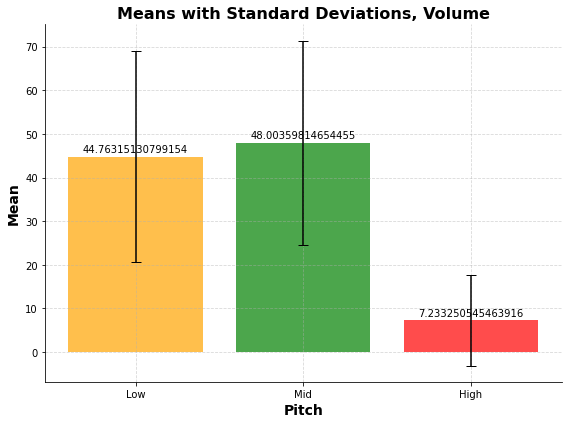

In [23]:
#for i in range(len(eco_pitchbars_low)):
#    print(eco_pitchbars_low[i]+eco_pitchbars_mid[i]+eco_pitchbars_high[i])
    
import numpy as np
import matplotlib.pyplot as plt

data = [
    eco_pitchbars_low,
    eco_pitchbars_mid,
    eco_pitchbars_high
]

eco_pitch_low_means = []
eco_pitch_low_std_devs = []
eco_pitch_low_means = (np.mean(eco_pitchbars_low))
eco_pitch_low_std_devs = (np.std(eco_pitchbars_low))
print("eco_pitch_low_means:", eco_pitch_low_means)
print("eco_pitch_low_std_devs:", eco_pitch_low_std_devs)

eco_pitch_mid_means = []
eco_pitch_mid_std_devs = []
eco_pitch_mid_means = (np.mean(eco_pitchbars_mid))
eco_pitch_mid_std_devs = (np.std(eco_pitchbars_mid))
print("eco_pitch_mid_means:", eco_pitch_mid_means)
print("eco_pitch_mid_std_devs:", eco_pitch_mid_std_devs)

eco_pitch_high_means = []
eco_pitch_high_std_devs = []
eco_pitch_high_means = (np.mean(eco_pitchbars_high))
eco_pitch_high_std_devs = (np.std(eco_pitchbars_high))
print("eco_pitch_high_means:", eco_pitch_high_means)
print("eco_pitch_high_std_devs:", eco_pitch_high_std_devs)

# 막대 그래프로 시각화
labels = ['Low', 'Mid', 'High']
means = [eco_pitch_low_means, eco_pitch_mid_means, eco_pitch_high_means]
std_devs = [eco_pitch_low_std_devs, eco_pitch_mid_std_devs, eco_pitch_high_std_devs]

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(labels, means, yerr=std_devs, capsize=5, color=['#FFA500', '#008000', '#FF0000'], alpha=0.7)
plt.xlabel('Pitch', fontsize=14, fontweight='bold')
plt.ylabel('Mean', fontsize=14, fontweight='bold')
plt.title('Means with Standard Deviations, Volume', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)

for i, v in enumerate(means):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)
    
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


eco_speed_low_means: 6.296807736845569
eco_speed_low_std_devs: 3.3716601217273885
eco_speed_mid_means: 91.70329388896589
eco_speed_mid_std_devs: 2.4627280353930345
eco_pitch_high_means: 1.9998983741885232
eco_pitch_high_std_devs: 2.414625751516319


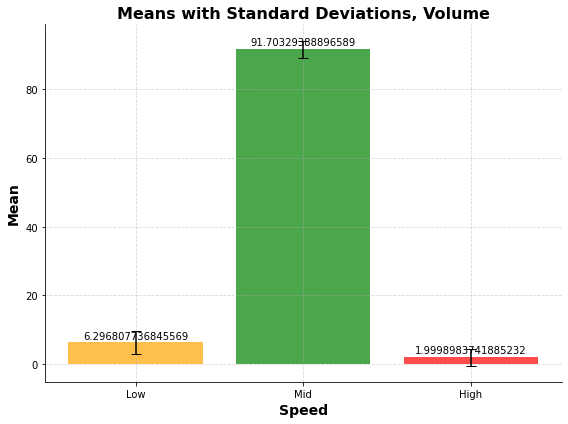

In [24]:
#for i in range(len(eco_speedbars_low)):
#    print(eco_speedbars_low[i]+eco_speedbars_mid[i]+eco_speedbars_high[i])
    
data = [
    eco_speedbars_low,
    eco_speedbars_mid,
    eco_speedbars_high
]

eco_speed_low_means = []
eco_speed_low_std_devs = []
eco_speed_low_means = (np.mean(eco_speedbars_low))
eco_speed_low_std_devs = (np.std(eco_speedbars_low))
print("eco_speed_low_means:", eco_speed_low_means)
print("eco_speed_low_std_devs:", eco_speed_low_std_devs)

eco_speed_mid_means = []
eco_speed_mid_std_devs = []
eco_speed_mid_means = (np.mean(eco_speedbars_mid))
eco_speed_mid_std_devs = (np.std(eco_speedbars_mid))
print("eco_speed_mid_means:", eco_speed_mid_means)
print("eco_speed_mid_std_devs:", eco_speed_mid_std_devs)

eco_speed_high_means = []
eco_speed_high_std_devs = []
eco_speed_high_means = (np.mean(eco_speedbars_high))
eco_speed_high_std_devs = (np.std(eco_speedbars_high))
print("eco_pitch_high_means:", eco_speed_high_means)
print("eco_pitch_high_std_devs:", eco_speed_high_std_devs)

# 막대 그래프로 시각화
labels = ['Low', 'Mid', 'High']
means = [eco_speed_low_means, eco_speed_mid_means, eco_speed_high_means]
std_devs = [eco_speed_low_std_devs, eco_speed_mid_std_devs, eco_speed_high_std_devs]

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(labels, means, yerr=std_devs, capsize=5, color=['#FFA500', '#008000', '#FF0000'], alpha=0.7)
plt.xlabel('Speed', fontsize=14, fontweight='bold')
plt.ylabel('Mean', fontsize=14, fontweight='bold')
plt.title('Means with Standard Deviations, Volume', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)

for i, v in enumerate(means):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)
    
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


eco_volume_low_means: 19.092914860806843
eco_volume_low_std_devs: 5.394146755705246
eco_volume_mid_means: 68.25447083062471
eco_volume_mid_std_devs: 9.192624234251003
eco_volume_high_means: 12.65261430856845
eco_volume_high_std_devs: 9.217082484230037


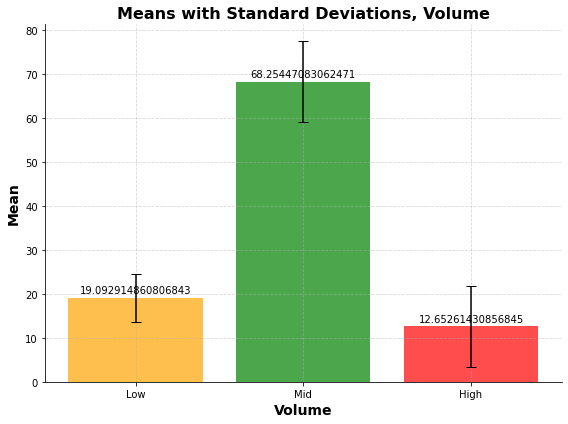

In [25]:
 data = [
    eco_volumebars_low,
    eco_volumebars_mid,
    eco_volumebars_high
]

eco_volume_low_means = []
eco_volume_low_std_devs = []
eco_volume_low_means = (np.mean(eco_volumebars_low))
eco_volume_low_std_devs = (np.std(eco_volumebars_low))
print("eco_volume_low_means:", eco_volume_low_means)
print("eco_volume_low_std_devs:", eco_volume_low_std_devs)

eco_volume_mid_means = []
eco_volume_mid_std_devs = []
eco_volume_mid_means = (np.mean(eco_volumebars_mid))
eco_volume_mid_std_devs = (np.std(eco_volumebars_mid))
print("eco_volume_mid_means:", eco_volume_mid_means)
print("eco_volume_mid_std_devs:", eco_volume_mid_std_devs)

eco_volume_high_means = []
eco_volume_high_std_devs = []
eco_volume_high_means = (np.mean(eco_volumebars_high))
eco_volume_high_std_devs = (np.std(eco_volumebars_high))
print("eco_volume_high_means:", eco_volume_high_means)
print("eco_volume_high_std_devs:", eco_volume_high_std_devs)

labels = ['Low', 'Mid', 'High']
means = [eco_volume_low_means, eco_volume_mid_means, eco_volume_high_means]
std_devs = [eco_volume_low_std_devs, eco_volume_mid_std_devs, eco_volume_high_std_devs]

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(labels, means, yerr=std_devs, capsize=5, color=['#FFA500', '#008000', '#FF0000'], alpha=0.7)
plt.xlabel('Volume', fontsize=14, fontweight='bold')
plt.ylabel('Mean', fontsize=14, fontweight='bold')
plt.title('Means with Standard Deviations, Volume', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)

for i, v in enumerate(means):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)
    
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


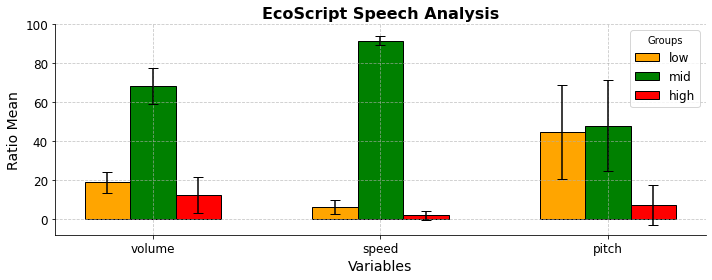

In [28]:
import numpy as np
import matplotlib.pyplot as plt

means = {
    'low': {
        'volume': eco_volume_low_means,
        'speed': eco_speed_low_means,
        'pitch': eco_pitch_low_means
    },
    'mid': {
        'volume': eco_volume_mid_means,
        'speed': eco_speed_mid_means,
        'pitch': eco_pitch_mid_means
    },
    'high': {
        'volume': eco_volume_high_means,
        'speed': eco_speed_high_means,
        'pitch': eco_pitch_high_means
    }
}

std_devs = {
    'low': {
        'volume': eco_volume_low_std_devs,
        'speed': eco_speed_low_std_devs,
        'pitch': eco_pitch_low_std_devs
    },
    'mid': {
        'volume': eco_volume_mid_std_devs,
        'speed': eco_speed_mid_std_devs,
        'pitch': eco_pitch_mid_std_devs
    },
    'high': {
        'volume': eco_volume_high_std_devs,
        'speed': eco_speed_high_std_devs,
        'pitch': eco_pitch_high_std_devs
    }
}

variables = ['volume', 'speed', 'pitch']
groups = ['low', 'mid', 'high']
colors = ['#FFA500', '#008000', '#FF0000']  # orange, green, red
plt.figure(figsize=(10, 4))

bar_width = 0.2
index = np.arange(len(variables))

for i, group in enumerate(groups):
    means_group = [means[group][var] for var in variables]
    std_devs_group = [std_devs[group][var] for var in variables]
    
    plt.bar(index + i * bar_width, means_group, bar_width, yerr=std_devs_group, capsize=5, label=group, color=colors[i], edgecolor='black')

plt.xlabel('Variables', fontsize=14)
plt.ylabel('Ratio Mean', fontsize=14)
plt.title('EcoScript Speech Analysis', fontsize=16, fontweight='bold')
plt.xticks(index + bar_width, variables, fontsize=12)
plt.yticks(np.arange(0, 101, 20), fontsize=12)

plt.legend(title='Groups', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
#plt.gca().set_facecolor('#F0F0F0')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### PPT

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

output_folder = '/Users/yang-eunseo/Desktop/log/ppt_plots2/'

for folder_name in ppt_folder_list:
    px_list = os.path.join(ppt_folder_path, folder_name)
    print("px_list:", px_list)
    
    df = pd.read_json(px_list)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    min_timestamp = df['timestamp'].min()
    df['time_elapsed'] = (df['timestamp'] - min_timestamp).dt.total_seconds() / 60  # 분 단위로 변환

    variables = ['volumeBarsColored', 'speedBarsColored', 'pitchBarsColored']
    colors = ['red', 'green', 'blue'] 

    fig, axs = plt.subplots(3, 1, figsize=(15, 10), dpi=300)  

    for i, var in enumerate(variables):
        if var in df.columns:
            filtered_df = df[df[var] != 0]
            axs[i].plot(filtered_df['time_elapsed'], filtered_df[var], label=var, marker='o', linestyle='-', markersize=4, color=colors[i])
            axs[i].set_xlabel('Time Elapsed (minutes)', fontsize=12)
            axs[i].set_ylabel('Values', fontsize=12)
            axs[i].set_title(var, fontsize=14, fontweight='bold')
            axs[i].legend()
            axs[i].grid(True, which='both', linestyle='--', linewidth=0.3)
            axs[i].xaxis.set_major_locator(MultipleLocator(0.5))  # x축 눈금을 0.5 단위로 설정
            axs[i].tick_params(axis='x', rotation=0)

    plt.tight_layout()
    plt.savefig(os.path.join(output_folder, f'{folder_name}_ppt_plot.png'))  
    plt.close() 

px_list: /Users/yang-eunseo/Desktop/log/ppt/P10_ppt_feedback_analysis_log.json
px_list: /Users/yang-eunseo/Desktop/log/ppt/P11_ppt_feedback_analysis_log2.json
px_list: /Users/yang-eunseo/Desktop/log/ppt/P12_ppt_feedback_analysis_log.json
px_list: /Users/yang-eunseo/Desktop/log/ppt/P13_ppt_feedback_analysis_log.json
px_list: /Users/yang-eunseo/Desktop/log/ppt/P14_ppt_feedback_analysis_log.json
px_list: /Users/yang-eunseo/Desktop/log/ppt/P15_ppt_feedback_analysis_log.json
px_list: /Users/yang-eunseo/Desktop/log/ppt/P16_ppt_feedback_analysis_log.json
px_list: /Users/yang-eunseo/Desktop/log/ppt/P17_ppt_feedback_analysis_log.json
px_list: /Users/yang-eunseo/Desktop/log/ppt/P18_ppt_feedback_analysis_log.json
px_list: /Users/yang-eunseo/Desktop/log/ppt/P19_ppt_feedback_analysis_log.json
px_list: /Users/yang-eunseo/Desktop/log/ppt/P1_ppt_feedback_analysis_log.json
px_list: /Users/yang-eunseo/Desktop/log/ppt/P20_ppt_feedback_analysis_log.json
px_list: /Users/yang-eunseo/Desktop/log/ppt/P2_ppt_f

In [10]:
ppt_volumebars_low = [];
ppt_volumebars_mid = [];
ppt_volumebars_high = [];
ppt_duration = [];

for folder_name in ppt_folder_list:
    px_list = os.path.join(ppt_folder_path, folder_name)
    print("px_list:", px_list)
    
    df = pd.read_json(px_list)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    min_timestamp = df['timestamp'].min()
    df['time_elapsed'] = (df['timestamp'] - min_timestamp).dt.total_seconds() / 60  # 분 단위로 변환

    print(df.describe())
    
    volume_list = df['volumeBarsColored'].tolist()
    total_sum = pd.Timedelta(seconds=0)
    temp_sum = pd.Timedelta(seconds=0)

    prev_one_or_two = False
    for idx, value in enumerate(volume_list):
        if value in [1, 2]:
            if not prev_one_or_two:
                # 1 또는 2에서 시작하는 경우, 시작 시간을 저장
                start_time = df.at[idx, 'timestamp']
            prev_one_or_two = True
        else:
            if prev_one_or_two:
                # 1 또는 2에서 1 또는 2로 이동하지 않는 경우, 종료 시간을 저장하고 시간을 계산
                end_time = df.at[idx, 'timestamp']
                duration = end_time - start_time
                temp_sum += duration
                total_sum += temp_sum

                temp_sum = pd.Timedelta(seconds=0)
            prev_one_or_two = False

    ppt_total_minutes_low = total_sum.total_seconds() / 60
    print("\n ppt_total_minutes_low")
    
    total_sum = pd.Timedelta(seconds=0)
    temp_sum = pd.Timedelta(seconds=0)

    prev_three_to_six = False

    for idx, value in enumerate(volume_list):
        if value in [3, 4, 5, 6]:
            if not prev_three_to_six:
                # 3, 4, 5, 6에서 시작하는 경우, 시작 시간을 저장
                start_time = df.at[idx, 'timestamp']
            prev_three_to_six = True
        else:
            if prev_three_to_six:
                # 3, 4, 5, 6에서 3, 4, 5, 6로 이동하지 않는 경우, 종료 시간을 저장하고 시간을 계산
                end_time = df.at[idx, 'timestamp']
                duration = end_time - start_time
                temp_sum += duration
                total_sum += temp_sum

                temp_sum = pd.Timedelta(seconds=0)
            prev_three_to_six = False

    ppt_total_minutes_mid = total_sum.total_seconds() / 60
    print("\n ppt_total_minutes_mid")
    
    total_sum = pd.Timedelta(seconds=0)
    temp_sum = pd.Timedelta(seconds=0)

    prev_seven_or_eight = False

    for idx, value in enumerate(volume_list):
        if value in [7, 8]:
            if not prev_seven_or_eight:
                # 7 또는 8에서 시작하는 경우, 시작 시간을 저장
                start_time = df.at[idx, 'timestamp']
            prev_seven_or_eight = True
        else:
            if prev_seven_or_eight:
                # 7 또는 8에서 7 또는 8로 이동하지 않는 경우, 종료 시간을 저장하고 시간을 계산
                end_time = df.at[idx, 'timestamp']
                duration = end_time - start_time
                temp_sum += duration
                total_sum += temp_sum
                # 임시 합계 초기화
                temp_sum = pd.Timedelta(seconds=0)
            prev_seven_or_eight = False

    ppt_total_minutes_high = total_sum.total_seconds() / 60
    print("\n ppt_total_minutes_high")
    
    print("\n비율 계산 (지속시간/전체시간)")
    ppt_total = ppt_total_minutes_high + ppt_total_minutes_mid + ppt_total_minutes_low
    ppt_ratio_low = ppt_total_minutes_low / ppt_total * 100
    ppt_ratio_mid = ppt_total_minutes_mid / ppt_total * 100
    ppt_ratio_high = ppt_total_minutes_high / ppt_total * 100
    print("total_minutes_low 비율: {:.2f}%".format(ppt_ratio_low))
    print("total_minutes_mid 비율: {:.2f}%".format(ppt_ratio_mid))
    print("total_minutes_high 비율: {:.2f}%".format(ppt_ratio_high),"\n\n")
    ppt_volumebars_low.append(ppt_ratio_low)
    ppt_volumebars_mid.append(ppt_ratio_mid)
    ppt_volumebars_high.append(ppt_ratio_high)
    

    print("카운트 계산")
    ppt_vol_low_count = ((df['volumeBarsColored'] == 1) | (df['volumeBarsColored'] == 2)).sum()
    ppt_vol_mid_count = ((df['volumeBarsColored'] == 3) | (df['volumeBarsColored'] == 4) | (df['volumeBarsColored'] == 5 | (df['volumeBarsColored'] == 6))).sum()
    ppt_vol_high_count = ((df['volumeBarsColored'] == 7) | (df['volumeBarsColored'] == 8)).sum()

    print("vol_low_count:",ppt_vol_low_count)
    print("vol_mid_count:", ppt_vol_mid_count)
    print("vol_low_count:",ppt_vol_high_count)
    ppt_last_time_elapsed = df['time_elapsed'].iloc[-1]
    print("Total duration: {:.2f}".format(ppt_last_time_elapsed))
    ppt_duration.append(ppt_last_time_elapsed)
    
    print("하나의 json 계산 끝남\n\n\n\n")
print("다 끝남")
    

px_list: /Users/yang-eunseo/Desktop/log/ppt/P10_ppt_feedback_analysis_log.json
        volumeData    speedData     pitchData  before_speed  \
count  8975.000000  8809.000000   2480.000000   8811.000000   
mean     39.006644     3.486094    295.146540      0.768540   
std      15.394640     0.840515   1460.917070      3.762699   
min       1.000000     0.000000     87.528117      0.000000   
25%      29.085938     3.000000    105.846491      0.000000   
50%      39.890625     3.000000    122.953260      0.000000   
75%      49.994141     4.000000    136.953351      0.000000   
max      91.246094     8.000000  16419.523794     27.651000   

       volumeBarsColored  speedBarsColored  pitchBarsColored  time_elapsed  
count        8975.000000       8813.000000       8975.000000   8975.000000  
mean            3.625738          3.482469          0.747744      2.987972  
std             1.264094          0.841403          1.319772      1.698946  
min             0.000000          0.000000   

        volumeData    speedData     pitchData  before_speed  \
count  8324.000000  8029.000000   2239.000000   8030.000000   
mean     43.614750     3.595342    542.392833      0.852209   
std      18.487213     0.864965   1982.173143      3.210882   
min       3.988281     1.000000     95.675234      0.000000   
25%      31.812500     3.000000    167.902693      0.000000   
50%      45.537109     4.000000    201.512222      0.000000   
75%      56.085938     4.000000    244.791277      0.000000   
max     124.945312     8.000000  16515.800108     16.965000   

       volumeBarsColored  speedBarsColored  pitchBarsColored  time_elapsed  
count        8324.000000       8029.000000       8324.000000   8324.000000  
mean            3.984863          3.604185          0.856319      2.671530  
std             1.509396          0.857867          1.635180      1.515188  
min             1.000000          1.000000          0.000000      0.000000  
25%             3.000000          3.000000     

vol_low_count: 3444
vol_mid_count: 5997
vol_low_count: 489
Total duration: 5.88
하나의 json 계산 끝남




px_list: /Users/yang-eunseo/Desktop/log/ppt/P3_ppt_feedback_analysis_log.json
        volumeData    speedData     pitchData  before_speed  \
count  6747.000000  6563.000000   2117.000000   6564.000000   
mean     40.598730     3.617248    293.351122      2.447482   
std      14.555394     1.321782    745.788250      5.943713   
min       5.832031     0.000000     93.593407      0.000000   
25%      31.207031     3.000000    195.226724      0.000000   
50%      39.656250     4.000000    213.463006      0.000000   
75%      49.015625     4.000000    240.997344      0.000000   
max      99.480469     8.000000  14272.193395     24.902000   

       volumeBarsColored  speedBarsColored  pitchBarsColored  time_elapsed  
count        6747.000000       6563.000000       6747.000000   6747.000000  
mean            3.751742          3.619229          1.202609      2.158453  
std             1.198079


 ppt_total_minutes_low

 ppt_total_minutes_mid

 ppt_total_minutes_high

비율 계산 (지속시간/전체시간)
total_minutes_low 비율: 30.16%
total_minutes_mid 비율: 69.18%
total_minutes_high 비율: 0.66% 


카운트 계산
vol_low_count: 2572
vol_mid_count: 5605
vol_low_count: 18
Total duration: 5.10
하나의 json 계산 끝남




px_list: /Users/yang-eunseo/Desktop/log/ppt/P9_ppt_feedback_analysis_log.json
        volumeData    speedData     pitchData  before_speed  \
count  6603.000000  6397.000000   2762.000000   6398.000000   
mean     43.588184     3.523527   3956.930886      0.664415   
std      14.344081     0.958790   6780.795631      2.933487   
min       5.210938     0.000000     93.718036      0.000000   
25%      34.171875     3.000000    195.174552      0.000000   
50%      43.300781     4.000000    234.954221      0.000000   
75%      53.089844     4.000000    554.863708      0.000000   
max      89.523438     8.000000  16996.090139     17.314000   

       volumeBarsColored  speedBarsColored  pitchBarsColored  time_

In [11]:
ppt_speedbars_low = [];
ppt_speedbars_mid = [];
ppt_speedbars_high = [];


for folder_name in ppt_folder_list:
    px_list = os.path.join(ppt_folder_path, folder_name)
    print("px_list:", px_list)
    
    df = pd.read_json(px_list)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    min_timestamp = df['timestamp'].min()
    df['time_elapsed'] = (df['timestamp'] - min_timestamp).dt.total_seconds() / 60  # 분 단위로 변환

    print(df.describe())
    
    speed_list = df['speedBarsColored'].tolist()
    total_sum = pd.Timedelta(seconds=0)
    temp_sum = pd.Timedelta(seconds=0)

    prev_one_or_two = False
    for idx, value in enumerate(speed_list):
        if value in [1, 2]:
            if not prev_one_or_two:
                # 1 또는 2에서 시작하는 경우, 시작 시간을 저장
                start_time = df.at[idx, 'timestamp']
            prev_one_or_two = True
        else:
            if prev_one_or_two:
                # 1 또는 2에서 1 또는 2로 이동하지 않는 경우, 종료 시간을 저장하고 시간을 계산
                end_time = df.at[idx, 'timestamp']
                duration = end_time - start_time
                temp_sum += duration
                total_sum += temp_sum

                temp_sum = pd.Timedelta(seconds=0)
            prev_one_or_two = False

    ppt_total_minutes_low = total_sum.total_seconds() / 60
    print("\n ppt_total_minutes_low")
    
    total_sum = pd.Timedelta(seconds=0)
    temp_sum = pd.Timedelta(seconds=0)

    prev_three_to_six = False

    for idx, value in enumerate(speed_list):
        if value in [3, 4, 5, 6]:
            if not prev_three_to_six:
                # 3, 4, 5, 6에서 시작하는 경우, 시작 시간을 저장
                start_time = df.at[idx, 'timestamp']
            prev_three_to_six = True
        else:
            if prev_three_to_six:
                # 3, 4, 5, 6에서 3, 4, 5, 6로 이동하지 않는 경우, 종료 시간을 저장하고 시간을 계산
                end_time = df.at[idx, 'timestamp']
                duration = end_time - start_time
                temp_sum += duration
                total_sum += temp_sum

                temp_sum = pd.Timedelta(seconds=0)
            prev_three_to_six = False

    ppt_total_minutes_mid = total_sum.total_seconds() / 60
    print("\n ppt_total_minutes_mid")
    
    total_sum = pd.Timedelta(seconds=0)
    temp_sum = pd.Timedelta(seconds=0)

    prev_seven_or_eight = False

    for idx, value in enumerate(speed_list):
        if value in [7, 8]:
            if not prev_seven_or_eight:
                # 7 또는 8에서 시작하는 경우, 시작 시간을 저장
                start_time = df.at[idx, 'timestamp']
            prev_seven_or_eight = True
        else:
            if prev_seven_or_eight:
                # 7 또는 8에서 7 또는 8로 이동하지 않는 경우, 종료 시간을 저장하고 시간을 계산
                end_time = df.at[idx, 'timestamp']
                duration = end_time - start_time
                temp_sum += duration
                total_sum += temp_sum
                # 임시 합계 초기화
                temp_sum = pd.Timedelta(seconds=0)
            prev_seven_or_eight = False

    ppt_total_minutes_high = total_sum.total_seconds() / 60
    print("\n ppt_total_minutes_high")
    
    print("\n비율 계산 (지속시간/전체시간)")
    ppt_total = ppt_total_minutes_high + ppt_total_minutes_mid + ppt_total_minutes_low
    ppt_ratio_low = ppt_total_minutes_low / ppt_total * 100
    ppt_ratio_mid = ppt_total_minutes_mid / ppt_total * 100
    ppt_ratio_high = ppt_total_minutes_high / ppt_total * 100
    print("total_minutes_low 비율: {:.2f}%".format(ppt_ratio_low))
    print("total_minutes_mid 비율: {:.2f}%".format(ppt_ratio_mid))
    print("total_minutes_high 비율: {:.2f}%".format(ppt_ratio_high),"\n\n")
    ppt_speedbars_low.append(ppt_ratio_low)
    ppt_speedbars_mid.append(ppt_ratio_mid)
    ppt_speedbars_high.append(ppt_ratio_high)
    

    print("카운트 계산")
    ppt_vol_low_count = ((df['volumeBarsColored'] == 1) | (df['volumeBarsColored'] == 2)).sum()
    ppt_vol_mid_count = ((df['volumeBarsColored'] == 3) | (df['volumeBarsColored'] == 4) | (df['volumeBarsColored'] == 5 | (df['volumeBarsColored'] == 6))).sum()
    ppt_vol_high_count = ((df['volumeBarsColored'] == 7) | (df['volumeBarsColored'] == 8)).sum()

    print("vol_low_count:",ppt_vol_low_count)
    print("vol_mid_count:", ppt_vol_mid_count)
    print("vol_low_count:",ppt_vol_high_count)
    ppt_last_time_elapsed = df['time_elapsed'].iloc[-1]
    print("Total duration: {:.2f}".format(ppt_last_time_elapsed))
    
    print("하나의 json 계산 끝남\n\n\n\n")
print("다 끝남")
    

px_list: /Users/yang-eunseo/Desktop/log/ppt/P10_ppt_feedback_analysis_log.json
        volumeData    speedData     pitchData  before_speed  \
count  8975.000000  8809.000000   2480.000000   8811.000000   
mean     39.006644     3.486094    295.146540      0.768540   
std      15.394640     0.840515   1460.917070      3.762699   
min       1.000000     0.000000     87.528117      0.000000   
25%      29.085938     3.000000    105.846491      0.000000   
50%      39.890625     3.000000    122.953260      0.000000   
75%      49.994141     4.000000    136.953351      0.000000   
max      91.246094     8.000000  16419.523794     27.651000   

       volumeBarsColored  speedBarsColored  pitchBarsColored  time_elapsed  
count        8975.000000       8813.000000       8975.000000   8975.000000  
mean            3.625738          3.482469          0.747744      2.987972  
std             1.264094          0.841403          1.319772      1.698946  
min             0.000000          0.000000   

        volumeData    speedData     pitchData  before_speed  \
count  8324.000000  8029.000000   2239.000000   8030.000000   
mean     43.614750     3.595342    542.392833      0.852209   
std      18.487213     0.864965   1982.173143      3.210882   
min       3.988281     1.000000     95.675234      0.000000   
25%      31.812500     3.000000    167.902693      0.000000   
50%      45.537109     4.000000    201.512222      0.000000   
75%      56.085938     4.000000    244.791277      0.000000   
max     124.945312     8.000000  16515.800108     16.965000   

       volumeBarsColored  speedBarsColored  pitchBarsColored  time_elapsed  
count        8324.000000       8029.000000       8324.000000   8324.000000  
mean            3.984863          3.604185          0.856319      2.671530  
std             1.509396          0.857867          1.635180      1.515188  
min             1.000000          1.000000          0.000000      0.000000  
25%             3.000000          3.000000     

        volumeData    speedData     pitchData  before_speed  \
count  6747.000000  6563.000000   2117.000000   6564.000000   
mean     40.598730     3.617248    293.351122      2.447482   
std      14.555394     1.321782    745.788250      5.943713   
min       5.832031     0.000000     93.593407      0.000000   
25%      31.207031     3.000000    195.226724      0.000000   
50%      39.656250     4.000000    213.463006      0.000000   
75%      49.015625     4.000000    240.997344      0.000000   
max      99.480469     8.000000  14272.193395     24.902000   

       volumeBarsColored  speedBarsColored  pitchBarsColored  time_elapsed  
count        6747.000000       6563.000000       6747.000000   6747.000000  
mean            3.751742          3.619229          1.202609      2.158453  
std             1.198079          1.317100          2.049059      1.215835  
min             1.000000          0.000000          0.000000      0.000000  
25%             3.000000          3.000000     

In [12]:
ppt_pitchbars_low = [];
ppt_pitchbars_mid = [];
ppt_pitchbars_high = [];

for folder_name in ppt_folder_list:
    px_list = os.path.join(ppt_folder_path, folder_name)
    print("px_list:", px_list)
    
    df = pd.read_json(px_list)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    min_timestamp = df['timestamp'].min()
    df['time_elapsed'] = (df['timestamp'] - min_timestamp).dt.total_seconds() / 60  # 분 단위로 변환

    print(df.describe())
    
    pitch_list = df['pitchBarsColored'].tolist()
    total_sum = pd.Timedelta(seconds=0)
    temp_sum = pd.Timedelta(seconds=0)

    prev_one_or_two = False
    for idx, value in enumerate(pitch_list):
        if value in [1, 2]:
            if not prev_one_or_two:
                # 1 또는 2에서 시작하는 경우, 시작 시간을 저장
                start_time = df.at[idx, 'timestamp']
            prev_one_or_two = True
        else:
            if prev_one_or_two:
                # 1 또는 2에서 1 또는 2로 이동하지 않는 경우, 종료 시간을 저장하고 시간을 계산
                end_time = df.at[idx, 'timestamp']
                duration = end_time - start_time
                temp_sum += duration
                total_sum += temp_sum

                temp_sum = pd.Timedelta(seconds=0)
            prev_one_or_two = False

    ppt_total_minutes_low = total_sum.total_seconds() / 60
    print("\n ppt_total_minutes_low")
    
    total_sum = pd.Timedelta(seconds=0)
    temp_sum = pd.Timedelta(seconds=0)

    prev_three_to_six = False

    for idx, value in enumerate(pitch_list):
        if value in [3, 4, 5, 6]:
            if not prev_three_to_six:
                # 3, 4, 5, 6에서 시작하는 경우, 시작 시간을 저장
                start_time = df.at[idx, 'timestamp']
            prev_three_to_six = True
        else:
            if prev_three_to_six:
                # 3, 4, 5, 6에서 3, 4, 5, 6로 이동하지 않는 경우, 종료 시간을 저장하고 시간을 계산
                end_time = df.at[idx, 'timestamp']
                duration = end_time - start_time
                temp_sum += duration
                total_sum += temp_sum

                temp_sum = pd.Timedelta(seconds=0)
            prev_three_to_six = False

    ppt_total_minutes_mid = total_sum.total_seconds() / 60
    print("\n ppt_total_minutes_mid")
    
    total_sum = pd.Timedelta(seconds=0)
    temp_sum = pd.Timedelta(seconds=0)

    prev_seven_or_eight = False

    for idx, value in enumerate(pitch_list):
        if value in [7, 8]:
            if not prev_seven_or_eight:
                # 7 또는 8에서 시작하는 경우, 시작 시간을 저장
                start_time = df.at[idx, 'timestamp']
            prev_seven_or_eight = True
        else:
            if prev_seven_or_eight:
                # 7 또는 8에서 7 또는 8로 이동하지 않는 경우, 종료 시간을 저장하고 시간을 계산
                end_time = df.at[idx, 'timestamp']
                duration = end_time - start_time
                temp_sum += duration
                total_sum += temp_sum
                # 임시 합계 초기화
                temp_sum = pd.Timedelta(seconds=0)
            prev_seven_or_eight = False

    ppt_total_minutes_high = total_sum.total_seconds() / 60
    print("\n ppt_total_minutes_high")
    
    print("\n비율 계산 (지속시간/전체시간)")
    ppt_total = ppt_total_minutes_high + ppt_total_minutes_mid + ppt_total_minutes_low
    ppt_ratio_low = ppt_total_minutes_low / ppt_total * 100
    ppt_ratio_mid = ppt_total_minutes_mid / ppt_total * 100
    ppt_ratio_high = ppt_total_minutes_high / ppt_total * 100
    print("total_minutes_low 비율: {:.2f}%".format(ppt_ratio_low))
    print("total_minutes_mid 비율: {:.2f}%".format(ppt_ratio_mid))
    print("total_minutes_high 비율: {:.2f}%".format(ppt_ratio_high),"\n\n")
    ppt_pitchbars_low.append(ppt_ratio_low)
    ppt_pitchbars_mid.append(ppt_ratio_mid)
    ppt_pitchbars_high.append(ppt_ratio_high)
    

    print("카운트 계산")
    ppt_vol_low_count = ((df['volumeBarsColored'] == 1) | (df['volumeBarsColored'] == 2)).sum()
    ppt_vol_mid_count = ((df['volumeBarsColored'] == 3) | (df['volumeBarsColored'] == 4) | (df['volumeBarsColored'] == 5 | (df['volumeBarsColored'] == 6))).sum()
    ppt_vol_high_count = ((df['volumeBarsColored'] == 7) | (df['volumeBarsColored'] == 8)).sum()

    print("vol_low_count:", ppt_vol_low_count)
    print("vol_mid_count:", ppt_vol_mid_count)
    print("vol_low_count:", ppt_vol_high_count)
    ppt_last_time_elapsed = df['time_elapsed'].iloc[-1]
    print("Total duration: {:.2f}".format(ppt_last_time_elapsed))
    
    print("하나의 json 계산 끝남\n\n\n\n")
print("다 끝남")
    

px_list: /Users/yang-eunseo/Desktop/log/ppt/P10_ppt_feedback_analysis_log.json
        volumeData    speedData     pitchData  before_speed  \
count  8975.000000  8809.000000   2480.000000   8811.000000   
mean     39.006644     3.486094    295.146540      0.768540   
std      15.394640     0.840515   1460.917070      3.762699   
min       1.000000     0.000000     87.528117      0.000000   
25%      29.085938     3.000000    105.846491      0.000000   
50%      39.890625     3.000000    122.953260      0.000000   
75%      49.994141     4.000000    136.953351      0.000000   
max      91.246094     8.000000  16419.523794     27.651000   

       volumeBarsColored  speedBarsColored  pitchBarsColored  time_elapsed  
count        8975.000000       8813.000000       8975.000000   8975.000000  
mean            3.625738          3.482469          0.747744      2.987972  
std             1.264094          0.841403          1.319772      1.698946  
min             0.000000          0.000000   

        volumeData    speedData     pitchData  before_speed  \
count  8324.000000  8029.000000   2239.000000   8030.000000   
mean     43.614750     3.595342    542.392833      0.852209   
std      18.487213     0.864965   1982.173143      3.210882   
min       3.988281     1.000000     95.675234      0.000000   
25%      31.812500     3.000000    167.902693      0.000000   
50%      45.537109     4.000000    201.512222      0.000000   
75%      56.085938     4.000000    244.791277      0.000000   
max     124.945312     8.000000  16515.800108     16.965000   

       volumeBarsColored  speedBarsColored  pitchBarsColored  time_elapsed  
count        8324.000000       8029.000000       8324.000000   8324.000000  
mean            3.984863          3.604185          0.856319      2.671530  
std             1.509396          0.857867          1.635180      1.515188  
min             1.000000          1.000000          0.000000      0.000000  
25%             3.000000          3.000000     

        volumeData    speedData     pitchData  before_speed  \
count  9879.000000  8989.000000   3067.000000   8990.000000   
mean     34.051135     1.185004    315.467905    148.244039   
std      19.803159     0.667557    833.937424     86.163007   
min       0.687500     1.000000     87.560643      0.000000   
25%      21.494141     1.000000    201.467178     76.771000   
50%      30.562500     1.000000    230.881347    148.508000   
75%      41.925781     1.000000    269.089310    222.722000   
max     123.261719     4.000000  15316.585726    296.828000   

       volumeBarsColored  speedBarsColored  pitchBarsColored  time_elapsed  
count        9879.000000       8991.000000       9879.000000   9879.000000  
mean            3.210953          1.185630          1.240510      3.101024  
std             1.614007          0.669798          2.044864      1.611797  
min             0.000000          0.000000          0.000000      0.000000  
25%             2.000000          1.000000     

        volumeData    speedData     pitchData  before_speed  \
count  8169.000000  7754.000000   2539.000000   7755.000000   
mean     33.252952     3.535595   9005.036821      0.808633   
std      17.691059     0.811268   7759.370677      2.855457   
min       2.449219     0.000000     86.301370      0.000000   
25%      19.199219     3.000000    135.778201      0.000000   
50%      35.304688     3.000000  12286.665163      0.000000   
75%      46.460938     4.000000  16508.336349      0.000000   
max      80.578125     8.000000  16997.356926     15.890000   

       volumeBarsColored  speedBarsColored  pitchBarsColored  time_elapsed  
count        8169.000000       7754.000000       8169.000000   8169.000000  
mean            3.170278          3.542559          1.855919      2.551016  
std             1.427575          0.805666          3.108734      1.474383  
min             1.000000          0.000000          0.000000      0.000000  
25%             2.000000          3.000000     

ppt_pitch_low_means: 36.26917558084041
ppt_pitch_low_std_devs: 27.673577732462494
ppt_pitch_mid_means: 53.20271674468463
ppt_pitch_mid_std_devs: 25.014032949875663
ppt_pitch_high_means: 10.528107674474954
ppt_pitch_high_std_devs: 13.515254070410963


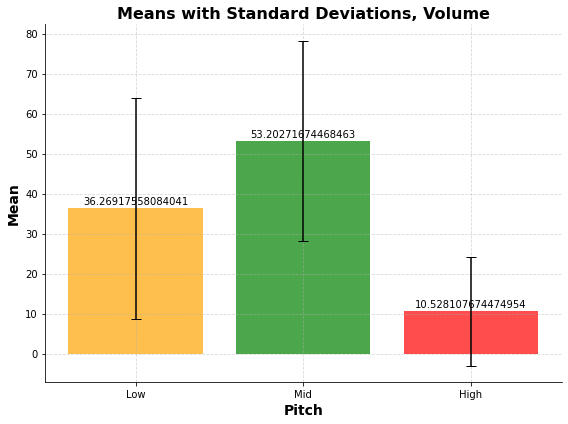

In [13]:
import numpy as np
import matplotlib.pyplot as plt

data = [
    ppt_pitchbars_low,
    ppt_pitchbars_mid,
    ppt_pitchbars_high
]

ppt_pitch_low_means = []
ppt_pitch_low_std_devs = []
ppt_pitch_low_means = (np.mean(ppt_pitchbars_low))
ppt_pitch_low_std_devs = (np.std(ppt_pitchbars_low))
print("ppt_pitch_low_means:", ppt_pitch_low_means)
print("ppt_pitch_low_std_devs:", ppt_pitch_low_std_devs)

ppt_pitch_mid_means = []
ppt_pitch_mid_std_devs = []
ppt_pitch_mid_means = (np.mean(ppt_pitchbars_mid))
ppt_pitch_mid_std_devs = (np.std(ppt_pitchbars_mid))
print("ppt_pitch_mid_means:", ppt_pitch_mid_means)
print("ppt_pitch_mid_std_devs:", ppt_pitch_mid_std_devs)

ppt_pitch_high_means = []
ppt_pitch_high_std_devs = []
ppt_pitch_high_means = (np.mean(ppt_pitchbars_high))
ppt_pitch_high_std_devs = (np.std(ppt_pitchbars_high))
print("ppt_pitch_high_means:", ppt_pitch_high_means)
print("ppt_pitch_high_std_devs:", ppt_pitch_high_std_devs)

# 막대 그래프로 시각화
labels = ['Low', 'Mid', 'High']
means = [ppt_pitch_low_means, ppt_pitch_mid_means, ppt_pitch_high_means]
std_devs = [ppt_pitch_low_std_devs, ppt_pitch_mid_std_devs, ppt_pitch_high_std_devs]

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(labels, means, yerr=std_devs, capsize=5, color=['#FFA500', '#008000', '#FF0000'], alpha=0.7)
plt.xlabel('Pitch', fontsize=14, fontweight='bold')
plt.ylabel('Mean', fontsize=14, fontweight='bold')
plt.title('Means with Standard Deviations, Volume', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)

for i, v in enumerate(means):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)
    
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


ppt_speed_low_means: 6.5729791992389845
ppt_speed_low_std_devs: 7.355162315217184
ppt_speed_mid_means: 91.65746187705587
ppt_speed_mid_std_devs: 7.129572144767815
ppt_pitch_high_means: 1.7695589237051557
ppt_pitch_high_std_devs: 1.195406408457803


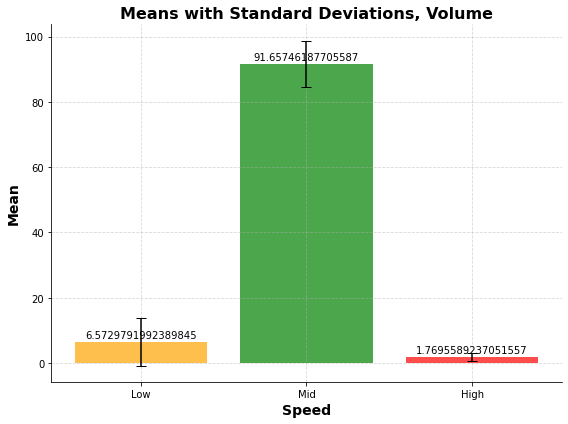

In [14]:
data = [
    ppt_speedbars_low,
    ppt_speedbars_mid,
    ppt_speedbars_high
]

ppt_speed_low_means = []
ppt_speed_low_std_devs = []
ppt_speed_low_means = (np.mean(ppt_speedbars_low))
ppt_speed_low_std_devs = (np.std(ppt_speedbars_low))
print("ppt_speed_low_means:", ppt_speed_low_means)
print("ppt_speed_low_std_devs:", ppt_speed_low_std_devs)

ppt_speed_mid_means = []
ppt_speed_mid_std_devs = []
ppt_speed_mid_means = (np.mean(ppt_speedbars_mid))
ppt_speed_mid_std_devs = (np.std(ppt_speedbars_mid))
print("ppt_speed_mid_means:", ppt_speed_mid_means)
print("ppt_speed_mid_std_devs:", ppt_speed_mid_std_devs)

ppt_speed_high_means = []
ppt_speed_high_std_devs = []
ppt_speed_high_means = (np.mean(ppt_speedbars_high))
ppt_speed_high_std_devs = (np.std(ppt_speedbars_high))
print("ppt_pitch_high_means:", ppt_speed_high_means)
print("ppt_pitch_high_std_devs:", ppt_speed_high_std_devs)

labels = ['Low', 'Mid', 'High']
means = [ppt_speed_low_means, ppt_speed_mid_means, ppt_speed_high_means]
std_devs = [ppt_speed_low_std_devs, ppt_speed_mid_std_devs, ppt_speed_high_std_devs]

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(labels, means, yerr=std_devs, capsize=5, color=['#FFA500', '#008000', '#FF0000'], alpha=0.7)
plt.xlabel('Speed', fontsize=14, fontweight='bold')
plt.ylabel('Mean', fontsize=14, fontweight='bold')
plt.title('Means with Standard Deviations, Volume', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)

for i, v in enumerate(means):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)
    
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


ppt_volume_low_means: 26.387162720536203
ppt_volume_low_std_devs: 16.842703877357977
ppt_volume_mid_means: 70.2895475199027
ppt_volume_mid_std_devs: 15.879214663787117
ppt_volume_high_means: 3.32328975956111
ppt_volume_high_std_devs: 5.778233707240657


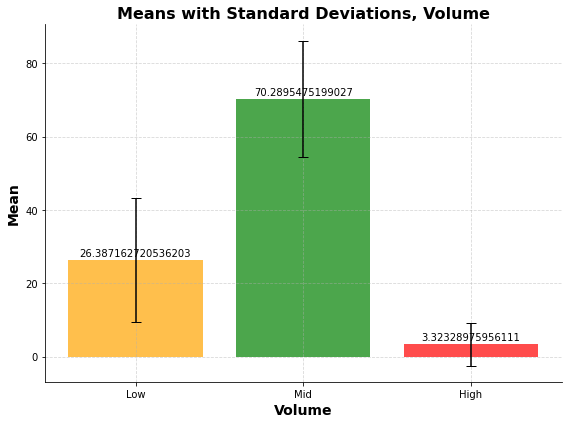

In [16]:
data = [
    ppt_volumebars_low,
    ppt_volumebars_mid,
    ppt_volumebars_high
]

ppt_volume_low_means = []
ppt_volume_low_std_devs = []
ppt_volume_low_means = (np.mean(ppt_volumebars_low))
ppt_volume_low_std_devs = (np.std(ppt_volumebars_low))
print("ppt_volume_low_means:", ppt_volume_low_means)
print("ppt_volume_low_std_devs:", ppt_volume_low_std_devs)

ppt_volume_mid_means = []
ppt_volume_mid_std_devs = []
ppt_volume_mid_means = (np.mean(ppt_volumebars_mid))
ppt_volume_mid_std_devs = (np.std(ppt_volumebars_mid))
print("ppt_volume_mid_means:", ppt_volume_mid_means)
print("ppt_volume_mid_std_devs:", ppt_volume_mid_std_devs)

ppt_volume_high_means = []
ppt_volume_high_std_devs = []
ppt_volume_high_means = (np.mean(ppt_volumebars_high))
ppt_volume_high_std_devs = (np.std(ppt_volumebars_high))
print("ppt_volume_high_means:", ppt_volume_high_means)
print("ppt_volume_high_std_devs:", ppt_volume_high_std_devs)

labels = ['Low', 'Mid', 'High']
means = [ppt_volume_low_means, ppt_volume_mid_means, ppt_volume_high_means]
std_devs = [ppt_volume_low_std_devs, ppt_volume_mid_std_devs, ppt_volume_high_std_devs]

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(labels, means, yerr=std_devs, capsize=5, color=['#FFA500', '#008000', '#FF0000'], alpha=0.7)
plt.xlabel('Volume', fontsize=14, fontweight='bold')
plt.ylabel('Mean', fontsize=14, fontweight='bold')
plt.title('Means with Standard Deviations, Volume', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)

for i, v in enumerate(means):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)
    
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


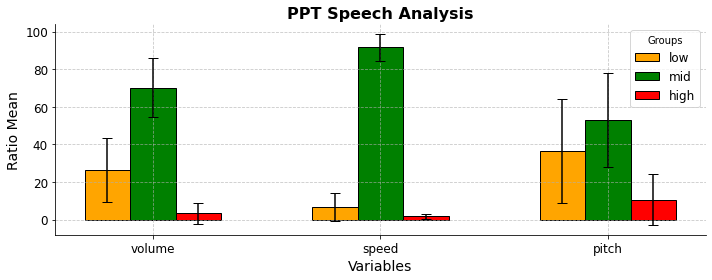

In [18]:
import numpy as np
import matplotlib.pyplot as plt

means = {
    'low': {
        'volume': ppt_volume_low_means,
        'speed': ppt_speed_low_means,
        'pitch': ppt_pitch_low_means
    },
    'mid': {
        'volume': ppt_volume_mid_means,
        'speed': ppt_speed_mid_means,
        'pitch': ppt_pitch_mid_means
    },
    'high': {
        'volume': ppt_volume_high_means,
        'speed': ppt_speed_high_means,
        'pitch': ppt_pitch_high_means
    }
}

std_devs = {
    'low': {
        'volume': ppt_volume_low_std_devs,
        'speed': ppt_speed_low_std_devs,
        'pitch': ppt_pitch_low_std_devs
    },
    'mid': {
        'volume': ppt_volume_mid_std_devs,
        'speed': ppt_speed_mid_std_devs,
        'pitch': ppt_pitch_mid_std_devs
    },
    'high': {
        'volume': ppt_volume_high_std_devs,
        'speed': ppt_speed_high_std_devs,
        'pitch': ppt_pitch_high_std_devs
    }
}

variables = ['volume', 'speed', 'pitch']
groups = ['low', 'mid', 'high']
colors = ['#FFA500', '#008000', '#FF0000']  # orange, green, red
plt.figure(figsize=(10, 4))

bar_width = 0.2
index = np.arange(len(variables))

for i, group in enumerate(groups):
    means_group = [means[group][var] for var in variables]
    std_devs_group = [std_devs[group][var] for var in variables]
    
    plt.bar(index + i * bar_width, means_group, bar_width, yerr=std_devs_group, capsize=5, label=group, color=colors[i], edgecolor='black')

plt.xlabel('Variables', fontsize=14)
plt.ylabel('Ratio Mean', fontsize=14)
plt.title('PPT Speech Analysis', fontsize=16, fontweight='bold')
plt.xticks(index + bar_width, variables, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Groups', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
#plt.gca().set_facecolor('#F0F0F0')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()